In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
import torch
import torchviz
import irt
import irt.distributions

In [43]:
def calc_loss(z):
    return torch.sum(z ** 2)

Backpropogation error for sample
z =  -0.7721578478813171


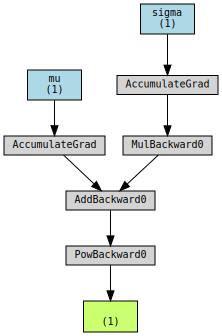

In [4]:
from torch.distributions import Normal
mu, sigma = torch.tensor([0.0], requires_grad=True), torch.tensor([1.0], requires_grad=True)
m = Normal(mu, sigma)

try:
    z = m.sample()
    loss = calc_loss(z)
    loss.backward()
except:
    print('Backpropogation error for sample')
    z = m.rsample()
    print('z = ', z.item())
    loss = calc_loss(z)
    # loss.backward()

torchviz.make_dot(loss,  params = {'mu': mu, 'sigma': sigma} )

Backpropogation error for sample
z =  1.343451976776123
tensor([2.6869]) tensor([3.6097])


/home/kreinin.mv/env/lib/python3.10/site-packages/torch/distributions/distribution.py:51: UserWarning: <class 'irt.distributions.Normal'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(f'{self.__class__} does not define `arg_constraints`. ' +


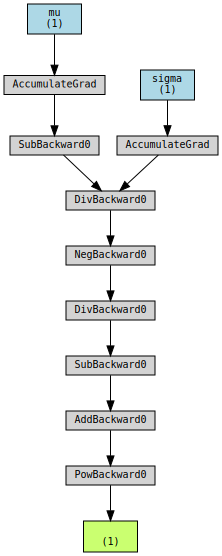

In [5]:


mu, sigma = torch.tensor([0.0], requires_grad=True), torch.tensor([1.0], requires_grad=True)
m = irt.distributions.Normal(mu, sigma)

# m.rsample()

try:
    z = m.sample()
    loss = calc_loss(z)
    loss.backward()
except:
    print('Backpropogation error for sample')
    z = m.rsample()
    print('z = ', z.item())
    loss = calc_loss(z)
    loss.backward()

# mu.grad, sigma.grad
print(mu.grad, sigma.grad)
torchviz.make_dot(loss,  params = {'mu': mu, 'sigma': sigma} )

In [89]:
dims = (2, 4)
locs = torch.tensor([[0., 1., 2., 3.], [4., 5., 6., 7.]], requires_grad=True)
stds = torch.abs(torch.randn(*dims, requires_grad=True))*3
mixture_probs=torch.softmax(torch.randn(*dims, requires_grad=True), dim=-1)

mixture = torch.distributions.Categorical(probs=mixture_probs)
components = torch.distributions.Normal(loc=locs, scale=stds)
m = torch.distributions.MixtureSameFamily(mixture_distribution=mixture, component_distribution=components)

try:
    z = m.sample()
    loss = calc_loss(z)
    loss.backward()
except:
    print('Backpropogation error for sample')
    z = m.rsample()
    loss = calc_loss(z)
    loss.backward()

# mu.grad, sigma.grad
print(mu.grad, sigma.grad)
torchviz.make_dot(loss,  params = {'mu': mu, 'sigma': sigma} )

Backpropogation error for sample


NotImplementedError: 

Backpropogation error for sample
tensor([[0.0117, 0.2317, 1.2498, 3.7233],
        [0.4498, 2.2741, 2.2958, 1.7448]]) tensor([[ 0.0359,  0.0829,  0.6191, -1.4246],
        [-0.0830, -0.4279, -1.9110, -2.3787]]) tensor([[ -9.0055,  -1.7626,  -2.7737,   4.0579],
        [-15.8116, -15.6605,   8.5582,  21.1914]])


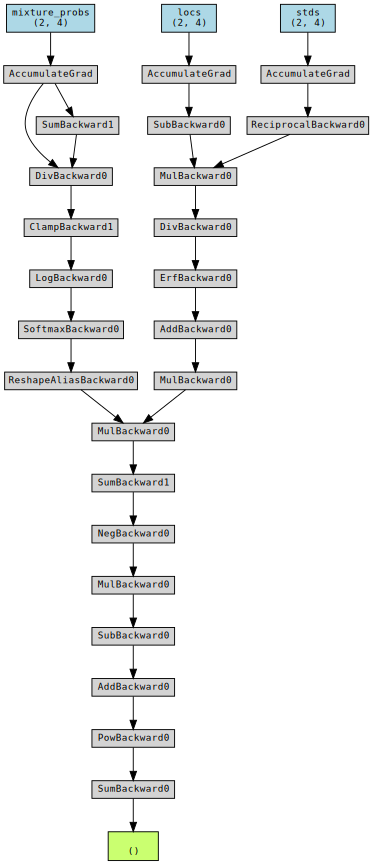

In [96]:
locs = torch.tensor([[0., 1., 2., 3.], [4., 5., 6., 7.]], requires_grad=True)
stds = torch.tensor([[0.8507, 4.4972, 1.2279, 1.0238], [3.3463, 8.5980, 3.1449, 2.6536]], requires_grad=True)
mixture_probs=torch.tensor([[0.1363, 0.1381, 0.2157, 0.5099],
        [0.0353, 0.4589, 0.2354, 0.2704]], requires_grad=True)

mixture_probs.enable_grad = True
locs.enable_grad = True
stds.enable_grad = True

mixture = torch.distributions.Categorical(probs=mixture_probs)
components = irt.distributions.Normal(loc=locs, scale=stds)
m = irt.distributions.MixtureSameFamily(mixture_distribution=mixture, component_distribution=components)

try:
    z = m.sample()
    loss = calc_loss(z)
    loss.backward()
except:
    print('Backpropogation error for sample')
    z = m.rsample()
    loss = calc_loss(z)
    loss.backward()

# mu.grad, sigma.grad
print(locs.grad, stds.grad, mixture_probs.grad)
torchviz.make_dot(loss,  params = {'locs': locs, 'stds': stds, 'mixture_probs': mixture_probs} )